# Import libraries

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()

import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
from plotly.subplots import make_subplots
from scipy import stats
import datetime as dt
from tabulate import tabulate
from statsmodels.formula.api import ols
import statsmodels.api as sm

# skewness

from scipy.stats import skew
from scipy.stats import norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# f_oneway
from scipy.stats import f_oneway


from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

---

In [ ]:
# connect with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


----

# Viewing dataset

In [ ]:
# load dataset
file_path = '/content/drive/MyDrive/0003. FTU SUBJECTS/010. PHÂN TÍCH DỮ LIỆU/08. CLOTHING/Clothing.csv'
df = pd.read_csv(file_path)
display(df.head())

,tsales,sales,margin,nown,nfull,npart,naux,hoursw,hourspw,inv1,inv2,ssize,start
0,750000,4411.765,41.0,1.0,1.0000,1.0000,1.5357,76,16.75596,17166.67,27177.04,170,41.0
1,1926395,4280.878,39.0,2.0,2.0000,3.0000,1.5357,192,22.49376,17166.67,27177.04,450,39.0
2,1250000,4166.667,40.0,1.0,2.0000,2.2222,1.4091,114,17.19120,292857.20,71570.55,300,40.0
3,694227,2670.104,40.0,1.0,1.0000,1.2833,1.3673,100,21.50260,22207.04,15000.00,260,40.0
4,750000,15000.000,44.0,2.0,1.9556,1.2833,1.3673,104,15.74279,22207.04,10000.00,50,44.0


---

## Infomation

In [ ]:
# Hiển thị thông tin cơ bản
print("THÔNG TIN CƠ BẢN VỀ DỮ LIỆU")
print("-" * 50)
print(f"Số lượng dòng: {df.shape[0]}")
print(f"Số lượng cột: {df.shape[1]}")
print("\nThông tin các cột:")
print(df.info())

THÔNG TIN CƠ BẢN VỀ DỮ LIỆU
--------------------------------------------------
Số lượng dòng: 400
Số lượng cột: 13

Thông tin các cột:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tsales   400 non-null    int64  
 1   sales    400 non-null    float64
 2   margin   400 non-null    float64
 3   nown     400 non-null    float64
 4   nfull    400 non-null    float64
 5   npart    400 non-null    float64
 6   naux     400 non-null    float64
 7   hoursw   400 non-null    int64  
 8   hourspw  400 non-null    float64
 9   inv1     400 non-null    float64
 10  inv2     400 non-null    float64
 11  ssize    400 non-null    int64  
 12  start    400 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 40.8 KB
None


---

### 📊 Mô tả Dữ liệu Clothing

Dữ liệu chứa thông tin về doanh số bán hàng của các cửa hàng thời trang nam ở Hà Lan vào năm 1990, với 400 quan sát, mỗi quan sát đại diện cho một đơn vị sản xuất.

---

## 🔹 Chi tiết từng cột

| **Tên cột** | **Mô tả**                                                         | **Số giá trị không null** | **Kiểu dữ liệu** |
|-------------|-------------------------------------------------------------------|---------------------------|------------------|
| `tsales`   | Doanh số hàng năm tính bằng guilder Hà Lan.                         | 400                       | int64            |
| `sales`    | Doanh số bán hàng trên mỗi mét vuông.                              | 400                       | float64          |
| `margin`   | Tỷ suất lợi nhuận gộp.                                             | 400                       | float64          |
| `nown`     | Số lượng chủ sở hữu (quản lý).                                      | 400                       | float64          |
| `nfull`    | Số lượng nhân viên toàn thời gian.                                 | 400                       | float64          |
| `npart`    | Số lượng nhân viên bán thời gian.                                  | 400                       | float64          |
| `naux`     | Số lượng nhân viên hỗ trợ (lao động tạm thời).                       | 400                       | float64          |
| `hoursw`   | Tổng số giờ làm việc.                                              | 400                       | int64            |
| `hourspw`  | Số giờ làm việc trung bình trên mỗi nhân viên.                     | 400                       | float64          |
| `inv1`     | Đầu tư vào cơ sở cửa hàng.                                          | 400                       | float64          |
| `inv2`     | Đầu tư vào tự động hóa.                                             | 400                       | float64          |
| `ssize`    | Diện tích sàn bán hàng của cửa hàng (tính bằng mét vuông).           | 400                       | int64            |
| `start`    | Năm bắt đầu kinh doanh.                                             | 400                       | float64          |

---

## 🔹 Tổng quan về kiểu dữ liệu

- **int64 (3 cột):** `tsales`, `hoursw`, `ssize`
- **float64 (10 cột):** `sales`, `margin`, `nown`, `nfull`, `npart`, `naux`, `hourspw`, `inv1`, `inv2`, `start`

---

## 📌 Nguồn dữ liệu

Bộ dữ liệu "Clothing" chứa thông tin về doanh số bán hàng của các cửa hàng thời trang nam ở Hà Lan vào năm 1990. Bộ dữ liệu này có thể được sử dụng để phân tích các yếu tố ảnh hưởng đến doanh số bán hàng và hiệu suất kinh doanh của các cửa hàng thời trang nam.


---

## Describe

In [ ]:
# numerical
print("\nThống kê mô tả cho các biến số:")
display(df.describe().T)


Thống kê mô tả cho các biến số:


,count,mean,std,min,25%,50%,75%,max
tsales,400.0,833584.212500,583463.838406,50000.000000,495340.000000,694227.000000,976817.000000,5.000000e+06
sales,400.0,6334.751278,3739.343624,300.000000,3904.200000,5278.935000,7739.899250,2.700000e+04
margin,400.0,38.774230,5.218184,16.000000,37.000000,39.000000,41.000000,6.600000e+01
nown,400.0,1.283796,0.639773,1.000000,1.000000,1.000000,1.295225,1.000000e+01
nfull,400.0,2.069384,1.015598,1.000000,1.923100,1.955600,2.066400,8.000000e+00
npart,400.0,1.565539,0.705999,1.000000,1.283300,1.283300,2.000000,9.000000e+00
naux,400.0,1.389747,0.394514,1.000000,1.333300,1.367300,1.367300,4.000000e+00
hoursw,400.0,121.137500,64.435343,32.000000,80.000000,104.000000,145.250000,5.820000e+02
hourspw,400.0,18.955044,7.343363,5.707966,13.541198,17.744585,24.302982,4.332602e+01
inv1,400.0,58257.255250,107558.770870,1000.000000,20000.000000,22207.040000,62269.230000,1.500000e+06


---

#📊 PHÂN TÍCH CÁC BIẾN SỐ

---
Histogram and boxplot

In [ ]:
def plot_numerical_features(df):
    # Danh sách các cột số
    numeric_cols = ['tsales', 'sales', 'margin', 'nown', 'nfull',
                   'npart', 'naux', 'hoursw', 'hourspw', 'inv1',
                   'inv2', 'ssize', 'start']

    # Từ điển chứa mô tả cho từng cột
    col_descriptions = {
        'tsales': 'Doanh số hàng năm',
        'sales': 'Doanh số trên mỗi mét vuông',
        'margin': 'Tỷ suất lợi nhuận gộp',
        'nown': 'Số lượng chủ sở hữu',
        'nfull': 'Nhân viên toàn thời gian',
        'npart': 'Nhân viên bán thời gian',
        'naux': '(lao động tạm thời)',
        'hoursw': 'Tổng số giờ làm việc',
        'hourspw': 'Số giờ làm việc trung bình',
        'inv1': 'Đầu tư vào cơ sở cửa hàng',
        'inv2': 'Đầu tư vào tự động hóa',
        'ssize': 'Diện tích sàn bán hàng',
        'start': 'Năm bắt đầu kinh doan'
    }

    # Tạo danh sách tiêu đề cho các subplot
    subplot_titles = []
    for col in numeric_cols:
        subplot_titles.append(f"Phân phối {col} \n({col_descriptions[col]})")
        subplot_titles.append(f"Boxplot {col}")

    fig = make_subplots(
        rows=len(numeric_cols),
        cols=2,
        vertical_spacing=0.02,
        subplot_titles=subplot_titles
    )

    # Vẽ biểu đồ cho từng cột
    for i, col in enumerate(numeric_cols):
        row = i + 1

        # Histogram
        fig.add_trace(go.Histogram(
            x=df[col],
            nbinsx=50,
            showlegend=False
        ), row=row, col=1)

        # Boxplot
        fig.add_trace(go.Box(
            y=df[col],
            showlegend=False
        ), row=row, col=2)

    fig.update_layout(
        height=300 * len(numeric_cols),  # Điều chỉnh chiều cao phù hợp với số lượng subplot
        margin=dict(t=40),
        title_text="Phân phối và Boxplot của các thuộc tính số",
        title_x=0.5
    )

    fig.show()

In [ ]:
plot_numerical_features(df)

## Hiển thị trực quan độ lệch

In [ ]:
from scipy.stats import skew

# Tính skewness cho tất cả các biến số
skewness = df.select_dtypes(include=np.number).apply(skew)
sorted_skewness = skewness.sort_values()

# Tạo biểu đồ cột ngang bằng Plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    y=sorted_skewness.index,  # Chuyển sang trục y để tạo bar chart ngang
    x=sorted_skewness.values,
    marker_color='blue',
    name="Skewness",
    orientation='h'  # Đặt bar chart theo chiều ngang
))

# Thêm các đường tham chiếu với màu đỏ
fig.add_vline(x=0, line=dict(color="red", width=3),
              annotation_text="<b>Phân phối đối xứng</b>", annotation_position="top left",
              annotation_font=dict(color="red", size=14))

fig.add_vline(x=1, line=dict(color="red", width=3, dash="dash"),
              annotation_text="<b>Độ lệch dương</b>", annotation_position="top right",
              annotation_font=dict(color="red", size=14))

fig.add_vline(x=-1, line=dict(color="red", width=3, dash="dash"),
              annotation_text="<b>Độ lệch âm</b>", annotation_position="bottom right",
              annotation_font=dict(color="red", size=14))

# Cập nhật layout
fig.update_layout(
    title="<b>Độ lệch (Skewness) của các biến</b>",
    xaxis_title="Skewness",
    yaxis_title="Tên biến",
    template="plotly_white",
    height=800,
    width=1000
)

# Hiển thị biểu đồ
fig.show()

---

## Xác định biến có độ lệch cao (|skewness| > 1)

In [ ]:
highly_skewed = skewness[abs(skewness) > 1].sort_values(ascending=False)
print("\n===== BIẾN CÓ ĐỘ LỆCH CAO =====")
print(highly_skewed)


===== BIẾN CÓ ĐỘ LỆCH CAO =====
inv1      7.015377
nown      6.978805
inv2      5.521868
npart     4.104691
naux      3.403592
ssize     3.251538
tsales    2.380106
start     2.034937
hoursw    2.017487
nfull     1.908429
sales     1.755397
dtype: float64


---

## Tạo bản sao của dataframe để biến đổi

In [ ]:
df_transformed = df.copy()

---

## Áp dụng biến đổi cho các biến có độ lệch cao

In [ ]:
for column in highly_skewed.index:
    # Đối với biến lệch phải (skewness > 1)
    if skewness[column] > 1:
        # Log transformation (cộng 1 để tránh log(0))
        if df[column].min() >= 0:  # Kiểm tra không có giá trị âm
            df_transformed[f"{column}_log"] = np.log1p(df[column])
            print(f"Đã áp dụng biến đổi Log cho {column}")

    # Đối với biến lệch trái (skewness < -1)
    elif skewness[column] < -1:
        # Square transformation (bình phương)
        df_transformed[f"{column}_squared"] = df[column] ** 2
        print(f"Đã áp dụng biến đổi bình phương cho {column}")

Đã áp dụng biến đổi Log cho inv1
Đã áp dụng biến đổi Log cho nown
Đã áp dụng biến đổi Log cho inv2
Đã áp dụng biến đổi Log cho npart
Đã áp dụng biến đổi Log cho naux
Đã áp dụng biến đổi Log cho ssize
Đã áp dụng biến đổi Log cho tsales
Đã áp dụng biến đổi Log cho start
Đã áp dụng biến đổi Log cho hoursw
Đã áp dụng biến đổi Log cho nfull
Đã áp dụng biến đổi Log cho sales


---

## So sánh độ lệch trước và sau khi biến đổi

In [ ]:
print("\n===== SO SÁNH ĐỘ LỆCH TRƯỚC VÀ SAU KHI BIẾN ĐỔI =====")
new_columns = [col for col in df_transformed.columns if col not in df.columns]
if new_columns:
    comparison = pd.DataFrame({
        'Skewness Ban Đầu': [skewness[col.split('_')[0]] for col in new_columns],
        'Skewness Sau Biến Đổi': df_transformed[new_columns].skew()
    }, index=[col for col in new_columns])
    print(comparison)


===== SO SÁNH ĐỘ LỆCH TRƯỚC VÀ SAU KHI BIẾN ĐỔI =====
            Skewness Ban Đầu  Skewness Sau Biến Đổi
inv1_log            7.015377               0.284233
nown_log            6.978805               2.356741
inv2_log            5.521868              -0.557723
npart_log           4.104691               1.581312
naux_log            3.403592               2.107635
ssize_log           3.251538               0.068985
tsales_log          2.380106              -0.690154
start_log           2.034937               1.087530
hoursw_log          2.017487               0.267729
nfull_log           1.908429               0.693455
sales_log           1.755397              -0.376844


---

## Hiển thị trực quan kết quả biến đổi cho các biến có độ lệch cao

In [ ]:

# Chỉ lấy tối đa 11 biến có độ lệch cao
if highly_skewed.shape[0] > 0:
    n_cols = min(11, highly_skewed.shape[0])

    # Tạo subplot với 2 cột (trước và sau biến đổi)
    fig = sp.make_subplots(
        rows=n_cols, cols=2,
        subplot_titles=[f"Phân phối gốc: {col}" if i % 2 == 0 else f"Sau biến đổi: {col}"
                        for col in highly_skewed.index[:n_cols] for i in range(2)]
    )

    # Duyệt qua từng biến có độ lệch cao
    for i, col in enumerate(highly_skewed.index[:n_cols]):
        row = i + 1  # Xác định dòng trong subplot

        # Biểu đồ phân phối gốc
        fig.add_trace(go.Histogram(
            x=df[col],
            nbinsx=50,
            name=f"Gốc - {col}",
            marker_color='blue'
        ), row=row, col=1)

        # Xác định loại biến đổi
        if skewness[col] > 1 and df[col].min() >= 0:
            trans_col = f"{col}_log"
        else:
            trans_col = f"{col}_squared"

        # Biểu đồ sau biến đổi (nếu tồn tại)
        if trans_col in df_transformed.columns:
            fig.add_trace(go.Histogram(
                x=df_transformed[trans_col],
                nbinsx=50,
                name=f"Biến đổi - {col}",
                marker_color='red'
            ), row=row, col=2)

    # Cập nhật layout
    fig.update_layout(
        title_text="Phân phối Gốc và Sau Biến Đổi của Các Biến Có Độ Lệch Cao",
        height=300 * n_cols,
        showlegend=False
    )

    # Hiển thị biểu đồ
    fig.show()

---

## Xử lý outliers cho các biến chưa được biến đổi log

In [ ]:
df_cleaned = df_transformed.copy()

In [ ]:
# Hàm Winsorization
def winsorize_data(df, col, limits=(0.05, 0.05)):
    df[f"{col}_winsor"] = stats.mstats.winsorize(df[col], limits=limits)
    return df

# Áp dụng winsorization cho biến tỷ lệ nếu chưa được biến đổi log
for col in ['margin', 'hourspw']:
    if f"{col}_log" not in df_cleaned.columns:
        df_cleaned = winsorize_data(df_cleaned, col)
        print(f"Đã áp dụng winsorization cho {col}")

Đã áp dụng winsorization cho margin
Đã áp dụng winsorization cho hourspw


---

## Tạo biến mới

In [ ]:
# Biến tuổi kinh doanh
df_cleaned['business_age'] = 1990 - df_cleaned['start']  # Năm nghiên cứu của dataset là 1990
print("Đã tạo biến business_age từ biến start")

# Biến nhân sự và hiệu quả
df_cleaned['total_staff'] = df_cleaned['nown'] + df_cleaned['nfull'] + df_cleaned['npart'] + df_cleaned['naux']
print("Đã tạo biến total_staff")

df_cleaned['staff_per_sqm'] = df_cleaned['total_staff'] / df_cleaned['ssize']
print("Đã tạo biến staff_per_sqm")

df_cleaned['hours_per_employee'] = df_cleaned['hoursw'] / df_cleaned['nfull'].replace(0, 1)
print("Đã tạo biến hours_per_employee")

# Biến đầu tư
df_cleaned['total_investment'] = df_cleaned['inv1'] + df_cleaned['inv2']
print("Đã tạo biến total_investment")

df_cleaned['investment_per_sqm'] = df_cleaned['total_investment'] / df_cleaned['ssize']
print("Đã tạo biến investment_per_sqm")

# Biến tài chính
df_cleaned['profit'] = df_cleaned['tsales'] * df_cleaned['margin'] / 100
df_cleaned['roi'] = (df_cleaned['profit'] - df_cleaned['total_investment']) / df_cleaned['total_investment']
df_cleaned['gmroi'] = df_cleaned['profit'] / df_cleaned['total_investment']
print("Đã tạo các biến tài chính: profit, roi, gmroi")

# Biến tỷ lệ đầu tư
df_cleaned['inv_ratio'] = df_cleaned['inv1'] / (df_cleaned['total_investment'] + 1)  # +1 để tránh lỗi chia cho 0
print("Đã tạo biến inv_ratio")

Đã tạo biến business_age từ biến start
Đã tạo biến total_staff
Đã tạo biến staff_per_sqm
Đã tạo biến hours_per_employee
Đã tạo biến total_investment
Đã tạo biến investment_per_sqm
Đã tạo các biến tài chính: profit, roi, gmroi
Đã tạo biến inv_ratio


---

# 📊 Phân Tích Insight - Bảng df_cleaned

## Heatmap

In [ ]:
df_cleaned.columns

Index(['tsales', 'sales', 'margin', 'nown', 'nfull', 'npart', 'naux', 'hoursw',
       'hourspw', 'inv1', 'inv2', 'ssize', 'start', 'inv1_log', 'nown_log',
       'inv2_log', 'npart_log', 'naux_log', 'ssize_log', 'tsales_log',
       'start_log', 'hoursw_log', 'nfull_log', 'sales_log', 'margin_winsor',
       'hourspw_winsor', 'business_age', 'total_staff', 'staff_per_sqm',
       'hours_per_employee', 'total_investment', 'investment_per_sqm',
       'profit', 'roi', 'gmroi', 'inv_ratio'],
      dtype='object')

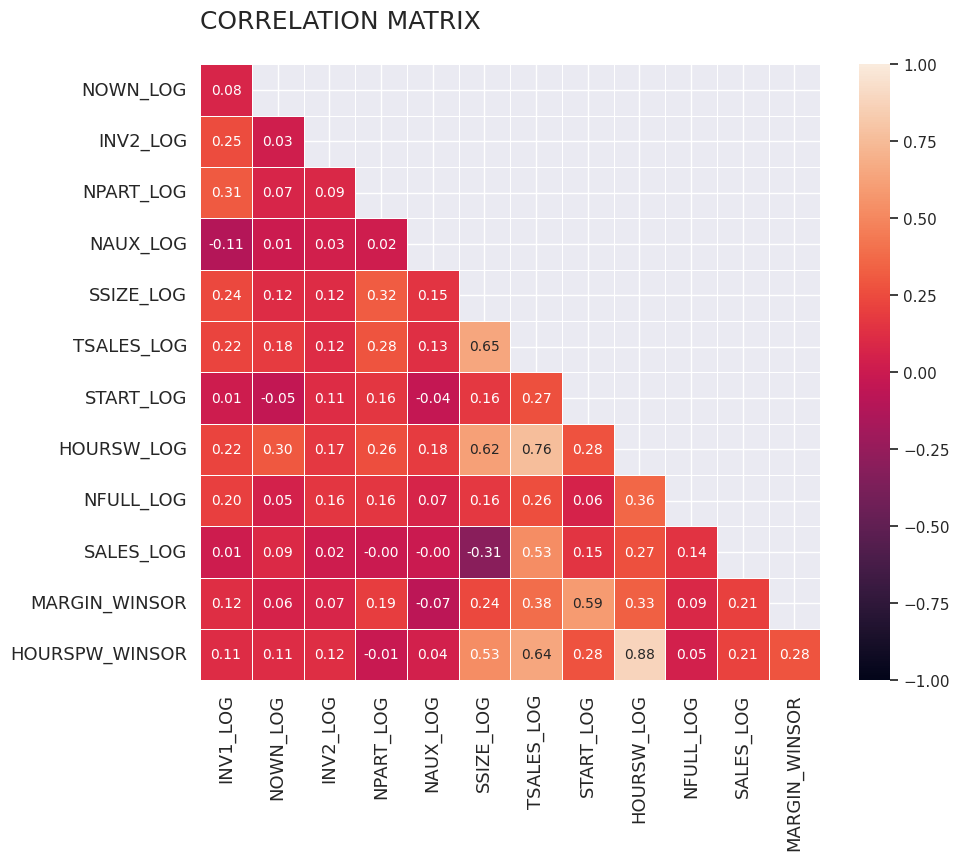

In [ ]:
# Select only numerical columns
numerical_df = ['inv1_log', 'nown_log',
       'inv2_log', 'npart_log', 'naux_log', 'ssize_log', 'tsales_log',
       'start_log', 'hoursw_log', 'nfull_log', 'sales_log', 'margin_winsor',
       'hourspw_winsor']

numerical_df = df_cleaned[numerical_df]

# compute correlation matrix
df_corr = numerical_df.corr()

# ones_like can build a matrix of boolean (True, False) with the same shape as our data
ones_corr  = np.ones_like(df_corr,dtype=bool)
# np. triu: return only upper triangle matrix
mask = np.triu(ones_corr)
adjusted_mask = mask[1:,:-1]
adjusted_df_corr = df_corr.iloc[1:,:-1]

fig, ax = plt.subplots(figsize=(10,8))

sns.heatmap(data= adjusted_df_corr, mask=adjusted_mask,
            annot=True, annot_kws={"fontsize":10}, fmt=".2f",
            vmin=-1, vmax=1,
            linecolor='white', linewidths=0.5);

yticks = [i.upper() for i in adjusted_df_corr.index]
xticks = [i.upper() for i in adjusted_df_corr.columns]

ax.set_yticklabels(yticks, rotation=0, fontsize=13);
ax.set_xticklabels(xticks, rotation=90, fontsize=13);
title = 'CORRELATION MATRIX\n'
ax.set_title(title, loc='left', fontsize=18);

---

## PHÂN TÍCH INSIGHT VỀ HIỆU SUẤT BÁN HÀNG THEO DIỆN TÍCH

In [ ]:
print("\n===== PHÂN TÍCH HIỆU SUẤT BÁN HÀNG THEO DIỆN TÍCH =====")


===== PHÂN TÍCH HIỆU SUẤT BÁN HÀNG THEO DIỆN TÍCH =====


---
### Phân phối doanh số trên mỗi mét vuông

In [ ]:
# Tạo histogram với Plotly
fig = go.Figure()

# Histogram của 'sales'
fig.add_trace(go.Histogram(
    x=df_cleaned['sales'],
    nbinsx=50,
    marker_color='blue',
    opacity=0.7,
    name='Phân phối doanh số/m²'
))

# Đường dọc thể hiện giá trị trung bình
mean_sales = df_cleaned['sales'].mean()
fig.add_trace(go.Scatter(
    x=[mean_sales, mean_sales],
    y=[0, max(np.histogram(df_cleaned['sales'], bins=50)[0])],
    mode='lines',
    line=dict(color='red', dash='dash'),
    name=f'Giá trị trung bình: {mean_sales:.2f}'
))

# Cập nhật layout
fig.update_layout(
    title="Phân phối Doanh số trên mỗi mét vuông",
    xaxis_title="Doanh số/m²",
    yaxis_title="Số lượng cửa hàng",
    template="plotly_white",
    showlegend=True
)

# Hiển thị biểu đồ
fig.show()

---

### Mối quan hệ giữa kích thước cửa hàng và doanh số

In [ ]:
# Tạo scatter plot với Plotly
fig = px.scatter(
    df_cleaned,
    x='ssize',
    y='sales',
    opacity=0.7,
    title='Mối quan hệ giữa Kích thước cửa hàng và Doanh số trên mỗi mét vuông',
    labels={'ssize': 'Kích thước cửa hàng (m²)', 'sales': 'Doanh số/m²'}
)

# Tính toán đường xu hướng phi tuyến bằng LOWESS
lowess = sm.nonparametric.lowess(df_cleaned['sales'], df_cleaned['ssize'], frac=0.3)
x_lowess, y_lowess = zip(*lowess)

# Thêm đường xu hướng màu đỏ
fig.add_trace(go.Scatter(
    x=x_lowess,
    y=y_lowess,
    mode='lines',
    line=dict(color='red', width=2),
    name='Đường xu hướng LOWESS'
))

# Cập nhật layout
fig.update_layout(
    template="plotly_white",
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridcolor='lightgray'),
    showlegend=True
)

# Hiển thị biểu đồ
fig.show()

---

### Phân nhóm cửa hàng theo kích thước

In [ ]:
bins = [0, 50, 100, 150, 200, 300, 500, df_cleaned['ssize'].max()]
labels = ['0-50', '51-100', '101-150', '151-200', '201-300', '301-500', '500+']
df_cleaned['ssize_group'] = pd.cut(df_cleaned['ssize'], bins=bins, labels=labels)

# Tính doanh số trung bình theo nhóm kích thước
sales_by_ssize = df_cleaned.groupby('ssize_group')['sales'].agg(['mean', 'median', 'count', 'std']).reset_index()
print("\n===== DOANH SỐ THEO NHÓM KÍCH THƯỚC =====")
display(sales_by_ssize)


===== DOANH SỐ THEO NHÓM KÍCH THƯỚC =====


,ssize_group,mean,median,count,std
0,0-50,7325.369222,6134.6900,36,4046.456062
1,51-100,7647.398698,6942.2700,132,4377.937791
2,101-150,6500.727663,5554.6860,98,3525.963697
3,151-200,4795.065825,4884.0850,57,1659.531280
4,201-300,4909.555750,4036.9675,44,2828.852881
5,301-500,4259.282267,4041.2025,30,2020.460524
6,500+,2180.535667,1688.8330,3,892.417859


---

In [ ]:
# Tạo biểu đồ cột với Plotly
fig = px.bar(
    sales_by_ssize,
    x='ssize_group',
    y='mean',
    text=sales_by_ssize['count'],  # Hiển thị số lượng cửa hàng trên mỗi cột
    labels={'ssize_group': 'Nhóm kích thước (m²)', 'mean': 'Doanh số trung bình/m²'},
    title='Doanh số trung bình trên mỗi mét vuông theo nhóm kích thước',
    template="plotly_white"
)

# Cập nhật bố cục và thêm số lượng cửa hàng vào mỗi cột
fig.update_traces(
    texttemplate='n=%{text}',
    textposition='outside',
    marker_color='royalblue'  # Màu sắc cột
)

# Hiển thị lưới trục y
fig.update_layout(
    yaxis=dict(showgrid=True, gridcolor='lightgray'),
    xaxis=dict(title="Nhóm kích thước (m²)"),
    yaxis_title="Doanh số trung bình/m²"
)

# Hiển thị biểu đồ
fig.show()

---
### Phân khúc cửa hàng theo hiệu suất

In [ ]:
# Định nghĩa ngưỡng dựa trên phân vị
low_threshold = df_cleaned['sales'].quantile(0.25)
high_threshold = df_cleaned['sales'].quantile(0.75)
very_high_threshold = df_cleaned['sales'].quantile(0.90)

# Tạo biến phân khúc hiệu suất
df_cleaned['sales_segment'] = pd.cut(
    df_cleaned['sales'],
    bins=[0, low_threshold, high_threshold, very_high_threshold, float('inf')],
    labels=['Hiệu suất thấp', 'Hiệu suất trung bình', 'Hiệu suất cao', 'Hiệu suất xuất sắc']
)

# Phân tích các cửa hàng hiệu suất cao và xuất sắc
high_performers = df_cleaned[df_cleaned['sales_segment'].isin(['Hiệu suất cao', 'Hiệu suất xuất sắc'])]

# Tạo bảng thống kê
stats_table = high_performers[['tsales', 'sales', 'ssize', 'margin']].describe().reset_index()
stats_table = stats_table.rename(columns={
    'index': 'Chỉ số',
    'tsales': 'Tổng doanh thu',
    'sales': 'Doanh số',
    'ssize': 'Kích thước',
    'margin': 'Biên lợi nhuận'
})

# Làm tròn các giá trị số để dễ đọc
for col in stats_table.columns[1:]:
    stats_table[col] = stats_table[col].apply(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)

print("\n🔍 PHÂN TÍCH CỬA HÀNG HIỆU SUẤT CAO VÀ XUẤT SẮC")
print(f"► Tổng số: {len(high_performers):,} cửa hàng")

if not high_performers.empty:
    print("\n📌 THỐNG KÊ CHỈ SỐ KINH DOANH:")
    print(tabulate(
        stats_table,
        headers='keys',
        tablefmt='pretty',
        showindex=False,
        numalign="center"
    ))
else:
    print("\n❗ Không tìm thấy cửa hàng nào có hiệu suất cao")


🔍 PHÂN TÍCH CỬA HÀNG HIỆU SUẤT CAO VÀ XUẤT SẮC
► Tổng số: 100 cửa hàng

📌 THỐNG KÊ CHỈ SỐ KINH DOANH:
+--------+----------------+----------+------------+----------------+
| Chỉ số | Tổng doanh thu | Doanh số | Kích thước | Biên lợi nhuận |
+--------+----------------+----------+------------+----------------+
| count  |     100.00     |  100.00  |   100.00   |     100.00     |
|  mean  |   1193418.18   | 11437.25 |   107.28   |     39.47      |
|  std   |   800365.22    | 3642.36  |   70.05    |      4.85      |
|  min   |   301133.00    | 7777.78  |   30.00    |     16.00      |
|  25%   |   694227.00    | 8650.95  |   63.75    |     38.00      |
|  50%   |   976817.00    | 10479.67 |   92.00    |     40.00      |
|  75%   |   1378586.00   | 12921.25 |   121.75   |     42.00      |
|  max   |   5000000.00   | 27000.00 |   430.00   |     52.00      |
+--------+----------------+----------+------------+----------------+


---
## TÌM NGƯỠNG TỐI ƯU CHO DIỆN TÍCH VÀ NHÂN SỰ

In [ ]:
print("\n===== XÁC ĐỊNH NGƯỠNG TỐI ƯU CHO DIỆN TÍCH VÀ NHÂN SỰ =====")


===== XÁC ĐỊNH NGƯỠNG TỐI ƯU CHO DIỆN TÍCH VÀ NHÂN SỰ =====


---
### Phân tích tương quan với doanh số/m²

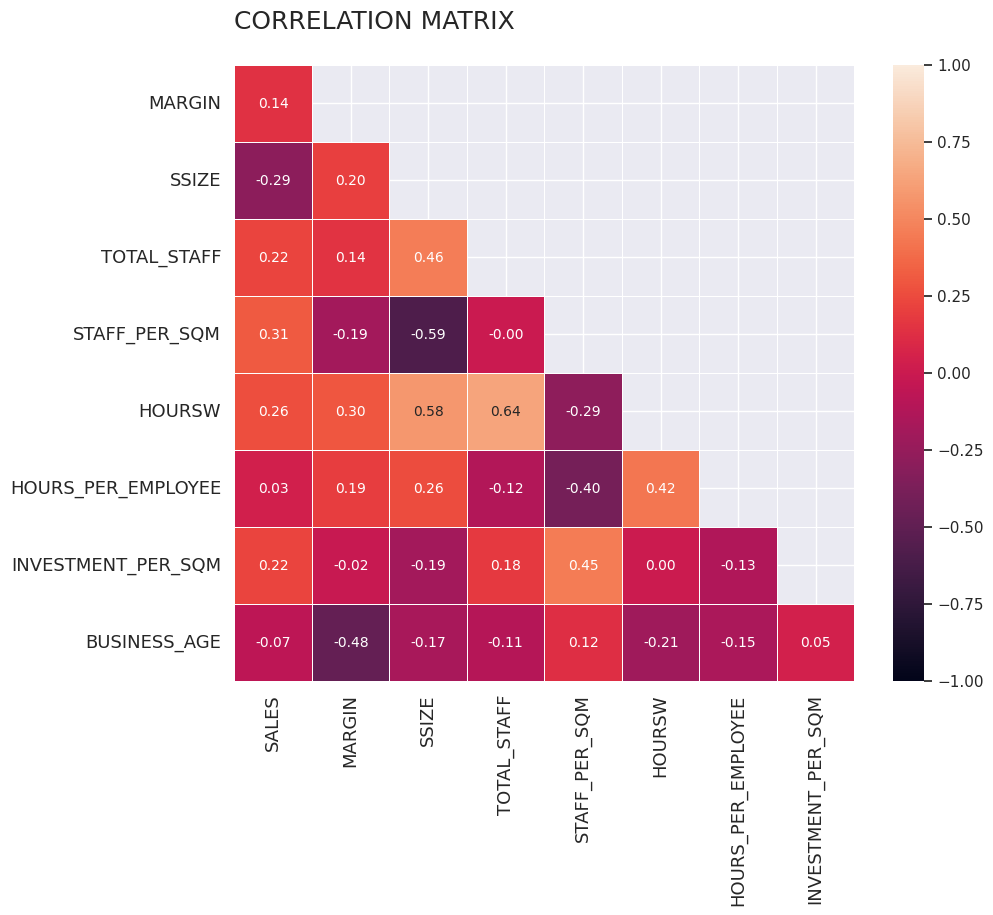

In [ ]:
# Select only numerical columns
numerical_df = ['sales', 'margin', 'ssize', 'total_staff', 'staff_per_sqm', 'hoursw', 'hours_per_employee', 'investment_per_sqm', 'business_age']

numerical_df = df_cleaned[numerical_df]

# compute correlation matrix
df_corr = numerical_df.corr()

# ones_like can build a matrix of boolean (True, False) with the same shape as our data
ones_corr  = np.ones_like(df_corr,dtype=bool)
# np. triu: return only upper triangle matrix
mask = np.triu(ones_corr)
adjusted_mask = mask[1:,:-1]
adjusted_df_corr = df_corr.iloc[1:,:-1]

fig, ax = plt.subplots(figsize=(10,8))

sns.heatmap(data= adjusted_df_corr, mask=adjusted_mask,
            annot=True, annot_kws={"fontsize":10}, fmt=".2f",
            vmin=-1, vmax=1,
            linecolor='white', linewidths=0.5);

yticks = [i.upper() for i in adjusted_df_corr.index]
xticks = [i.upper() for i in adjusted_df_corr.columns]

ax.set_yticklabels(yticks, rotation=0, fontsize=13);
ax.set_xticklabels(xticks, rotation=90, fontsize=13);
title = 'CORRELATION MATRIX\n'
ax.set_title(title, loc='left', fontsize=18);

---

### Phân tích doanh số theo kích thước cửa hàng và biên lợi nhuận

In [ ]:
# Tạo nhóm biên lợi nhuận
df_cleaned['margin_group'] = pd.qcut(df_cleaned['margin'], 4, labels=['Thấp', 'Trung bình thấp', 'Trung bình cao', 'Cao'])

# Tạo bảng pivot
pivot_table = df_cleaned.pivot_table(
    values='sales',
    index='ssize_group',
    columns='margin_group',
    aggfunc='mean'
)

# Tạo bảng hiển thị đẹp hơn
pivot_display = pivot_table.reset_index()
pivot_display = pivot_display.rename(columns={'ssize_group': 'Nhóm kích thước'})

# Làm tròn giá trị số để dễ đọc
for col in pivot_display.columns[1:]:
    pivot_display[col] = pivot_display[col].round(2)

print("\n🔍 PHÂN TÍCH DOANH SỐ/M² THEO KÍCH THƯỚC VÀ BIÊN LỢI NHUẬN")
print(f"► Tổng số: {len(df_cleaned):,} cửa hàng")

if not pivot_display.empty:
    print("\n📌 BẢNG PHÂN TÍCH CHI TIẾT:")
    print(tabulate(
        pivot_display,
        headers='keys',
        tablefmt='pretty',
        showindex=False,
        numalign="center"
    ))
else:
    print("\n❗ Không có dữ liệu cho phân tích này")


🔍 PHÂN TÍCH DOANH SỐ/M² THEO KÍCH THƯỚC VÀ BIÊN LỢI NHUẬN
► Tổng số: 400 cửa hàng

📌 BẢNG PHÂN TÍCH CHI TIẾT:
+-----------------+---------+-----------------+----------------+----------+
| Nhóm kích thước |  Thấp   | Trung bình thấp | Trung bình cao |   Cao    |
+-----------------+---------+-----------------+----------------+----------+
|      0-50       | 5904.58 |     8075.26     |    7479.96     | 13617.92 |
|     51-100      | 6431.64 |     7728.58     |    8170.45     | 9161.51  |
|     101-150     | 5398.71 |     5782.28     |    6688.04     | 8111.68  |
|     151-200     | 4216.79 |     4873.74     |    4732.41     | 5253.34  |
|     201-300     | 5094.46 |     4499.47     |    4369.75     | 5779.41  |
|     301-500     | 3608.33 |     4942.6      |    4282.78     | 3911.83  |
|      500+       |   nan   |       nan       |    2449.75     | 1642.12  |
+-----------------+---------+-----------------+----------------+----------+


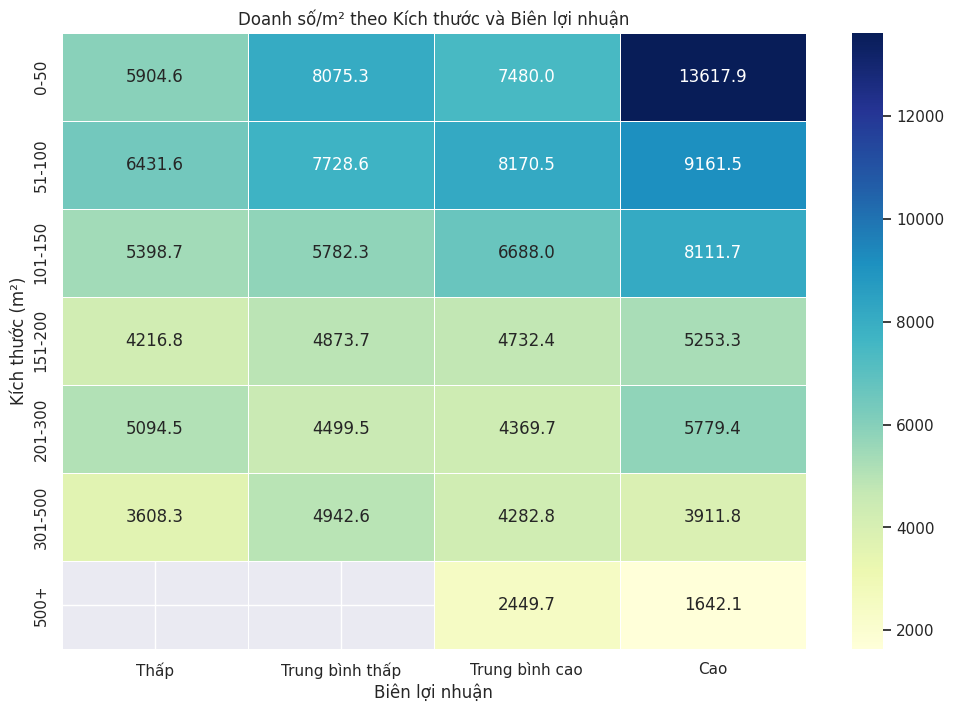

In [ ]:
# Biểu đồ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.1f', linewidths=0.5)
plt.title('Doanh số/m² theo Kích thước và Biên lợi nhuận')
plt.xlabel('Biên lợi nhuận')
plt.ylabel('Kích thước (m²)')
plt.show()

---

### Phân tích hiệu quả nhân sự

In [ ]:
# Nhóm theo giờ làm việc trên mỗi nhân viên
df_cleaned['hours_per_employee_group'] = pd.cut(
    df_cleaned['hours_per_employee'],
    bins=[0, 15, 20, 25, 30, float('inf')],
    labels=['<15', '15-20', '20-25', '25-30', '>30']
)

# Phân tích doanh số theo giờ làm việc trên mỗi nhân viên
hours_analysis = df_cleaned.groupby('hours_per_employee_group')['sales'].agg(['mean', 'median', 'count']).reset_index()
print("\n===== DOANH SỐ/M² THEO GIỜ LÀM VIỆC TRÊN MỖI NHÂN VIÊN =====")
display(hours_analysis)


===== DOANH SỐ/M² THEO GIỜ LÀM VIỆC TRÊN MỖI NHÂN VIÊN =====


,hours_per_employee_group,mean,median,count
0,<15,16666.670000,16666.6700,1
1,15-20,8250.268750,8232.8225,4
2,20-25,3567.187500,3125.0000,15
3,25-30,5196.058143,4503.0910,21
4,>30,6466.873907,5426.7610,359


In [ ]:
# Tạo biểu đồ cột với Plotly
fig = px.bar(
    hours_analysis,
    x="hours_per_employee_group",
    y="mean",
    text="count",  # Hiển thị số lượng cửa hàng trên cột
    labels={"hours_per_employee_group": "Giờ làm việc/nhân viên", "mean": "Doanh số trung bình/m²"},
    title="Doanh số trung bình/m² theo số giờ làm việc trên mỗi nhân viên",
    template="plotly_white",
    color="mean",  # Tô màu theo giá trị doanh số trung bình
    color_continuous_scale="Blues"
)

# Cập nhật hiển thị của text trên cột
fig.update_traces(texttemplate="n=%{text}", textposition="outside")

# Hiển thị lưới trên trục Y
fig.update_layout(yaxis=dict(showgrid=True, gridcolor="lightgray"))

# Hiển thị biểu đồ
fig.show()

---

### Xác định kích thước cửa hàng tối ưu

In [ ]:
# Tính kích thước trung bình của các cửa hàng hiệu suất xuất sắc
top_performers = df_cleaned[df_cleaned['sales_segment'] == 'Hiệu suất xuất sắc']
optimal_size = top_performers['ssize'].mean()

print("\n===== KÍCH THƯỚC CỬA HÀNG TỐI ƯU =====")
print(f"Kích thước trung bình của cửa hàng hiệu suất xuất sắc: {optimal_size:.2f} m²")
print(f"Phạm vi kích thước của cửa hàng hiệu suất xuất sắc: {top_performers['ssize'].min():.2f} - {top_performers['ssize'].max():.2f} m²")
print()

# Histogram cho top_performers
fig = px.histogram(top_performers, x='ssize', nbins=30, title='Phân phối kích thước cửa hàng hiệu suất xuất sắc')
fig = fig.update_layout(xaxis_title='Kích thước cửa hàng (m²)', yaxis_title='Số lượng cửa hàng')
fig.show()


===== KÍCH THƯỚC CỬA HÀNG TỐI ƯU =====
Kích thước trung bình của cửa hàng hiệu suất xuất sắc: 89.90 m²
Phạm vi kích thước của cửa hàng hiệu suất xuất sắc: 30.00 - 300.00 m²



---
## PHÂN TÍCH ROI VÀ ĐẦU TƯ

In [ ]:
print("\n===== PHÂN TÍCH TỶ SUẤT LỢI NHUẬN ĐẦU TƯ (ROI) =====")


===== PHÂN TÍCH TỶ SUẤT LỢI NHUẬN ĐẦU TƯ (ROI) =====


---

### Phân phối ROI

In [ ]:
# vẽ hist
fig = px.histogram(df_cleaned, x='roi', nbins=50, title='Phân phối ROI')
fig.show()

In [ ]:
import plotly.figure_factory as ff
import numpy as np

# Giới hạn giá trị ROI để loại bỏ ngoại lai
roi_filtered = np.clip(df_cleaned["roi"], -10, 20)

# Tạo histogram với KDE (đường mật độ)
fig = ff.create_distplot(
    [roi_filtered],  # Dữ liệu
    group_labels=["ROI"],  # Nhãn nhóm
    bin_size=0.5,  # Kích thước bins
    show_rug=False  # Ẩn rug plot
)

# Cập nhật layout
fig.update_layout(
    title="Phân phối ROI (Tỷ suất lợi nhuận đầu tư)",
    xaxis_title="ROI",
    yaxis_title="Mật độ",
    template="plotly_white",
    height=500,
    width=800
)

# Hiển thị biểu đồ
fig.show()

---
### ROI theo nhóm biên lợi nhuận

In [ ]:
roi_by_margin = df_cleaned.groupby('margin_group')['roi'].agg(['mean', 'median', 'count']).reset_index()
print("\n===== ROI THEO NHÓM BIÊN LỢI NHUẬN =====")
print(roi_by_margin)


===== ROI THEO NHÓM BIÊN LỢI NHUẬN =====
      margin_group      mean    median  count
0             Thấp  4.677164  3.074562    122
1  Trung bình thấp  6.871625  3.510210     90
2   Trung bình cao  8.126373  3.914238     96
3              Cao  9.707686  5.833191     92


In [81]:
def kiem_dinh_anova_roi():
    try:
        # Lọc các nhóm và chuẩn bị dữ liệu
        margin_groups = df_cleaned['margin_group'].unique()
        groups = [df_cleaned[df_cleaned['margin_group'] == group]['roi'] for group in margin_groups]

        # Thực hiện kiểm định ANOVA
        anova_result = f_oneway(*groups)

        # Vẽ boxplot với Plotly
        fig = px.box(
            df_cleaned,
            x='margin_group',
            y='roi',
            title='Phân phối ROI theo nhóm biên lợi nhuận',
            labels={'margin_group': 'Nhóm biên lợi nhuận', 'roi': 'ROI'},
            color='margin_group',
            color_discrete_sequence=px.colors.qualitative.Pastel
        )

        # Thêm đường trung bình tổng thể
        fig.add_hline(
            y=df_cleaned['roi'].mean(),
            line_dash="dash",
            line_color="red",
            annotation_text="Trung bình tổng thể",
            annotation_position="bottom right"
        )

        # Cập nhật layout
        fig.update_layout(
            showlegend=False,
            xaxis_title_font=dict(size=14),
            yaxis_title_font=dict(size=14),
            title_font=dict(size=16)
        )

        # Hiển thị biểu đồ
        fig.show()

        # Thống kê mô tả theo nhóm
        stats_data = []
        for group in margin_groups:
            data = df_cleaned[df_cleaned['margin_group'] == group]['roi']
            stats_data.append([
                f"{group}",
                f"{data.mean():.2f} ± {data.std():.2f}",
                len(data)
            ])

        # In kết quả định dạng bảng
        print("\n🔍 KIỂM ĐỊNH ANOVA - ROI THEO NHÓM BIÊN LỢI NHUẬN")
        print("="*65)
        print(tabulate(
            stats_data,
            headers=["Nhóm", "ROI TB ± Độ lệch", "Mẫu"],
            tablefmt="pretty",
            numalign="center"
        ))

        print(f"\n► F-value: {anova_result.statistic:.2f}")
        print(f"► P-value: {anova_result.pvalue:.5f}")

        # Kết luận thống kê
        if anova_result.pvalue < 0.05:
            print("\n📌 KẾT LUẬN: ✅ Tồn tại sự khác biệt có ý nghĩa thống kê về ROI giữa các nhóm biên lợi nhuận (p < 0.05)")
        else:
            print("\n📌 KẾT LUẬN: ❌ Không có sự khác biệt đáng kể về ROI giữa các nhóm biên lợi nhuận")

    except KeyError as e:
        print(f"⛔ Lỗi: Thiếu cột dữ liệu {str(e)}")
    except Exception as e:
        print(f"⛔ Lỗi hệ thống: {str(e)}")

kiem_dinh_anova_roi()


🔍 KIỂM ĐỊNH ANOVA - ROI THEO NHÓM BIÊN LỢI NHUẬN
+-----------------+------------------+-----+
|      Nhóm       | ROI TB ± Độ lệch | Mẫu |
+-----------------+------------------+-----+
| Trung bình cao  |   8.13 ± 14.16   | 96  |
| Trung bình thấp |   6.87 ± 12.03   | 90  |
|       Cao       |   9.71 ± 13.10   | 92  |
|      Thấp       |   4.68 ± 6.57    | 122 |
+-----------------+------------------+-----+

► F-value: 3.62
► P-value: 0.01334

📌 KẾT LUẬN: ✅ Tồn tại sự khác biệt có ý nghĩa thống kê về ROI giữa các nhóm biên lợi nhuận (p < 0.05)


---
### ROI theo cân bằng đầu tư

In [82]:
# Tạo nhóm tỷ lệ đầu tư
df_cleaned['inv_ratio_group'] = pd.cut(
    df_cleaned['inv_ratio'],
    bins=[0, 0.25, 0.5, 0.75, 1],
    labels=['<25%', '25-50%', '50-75%', '>75%']
)

# ROI theo tỷ lệ đầu tư
roi_by_inv_ratio = df_cleaned.groupby('inv_ratio_group')['roi'].agg(['mean', 'median', 'count']).reset_index()
print("\n===== ROI THEO TỶ LỆ ĐẦU TƯ (INV1/TỔNG) =====")
print(roi_by_inv_ratio)


===== ROI THEO TỶ LỆ ĐẦU TƯ (INV1/TỔNG) =====
  inv_ratio_group       mean    median  count
0            <25%   5.254380  2.820918     25
1          25-50%   7.399969  4.124893    178
2          50-75%  13.293563  8.602497     42
3            >75%   5.518810  2.939670    155


In [86]:
def kiem_dinh_anova_roi_inv_ratio():
    try:
        # Lọc các nhóm và chuẩn bị dữ liệu
        inv_ratio_groups = df_cleaned['inv_ratio_group'].unique()
        groups = [df_cleaned[df_cleaned['inv_ratio_group'] == group]['roi'] for group in inv_ratio_groups]

        # Thực hiện kiểm định ANOVA
        anova_result = f_oneway(*groups)

        # Vẽ boxplot với Plotly
        fig = px.box(
            df_cleaned,
            x='inv_ratio_group',
            y='roi',
            title='Phân phối ROI theo nhóm tỷ lệ đầu tư',
            labels={'inv_ratio_group': 'Nhóm tỷ lệ đầu tư', 'roi': 'ROI'},
            color='inv_ratio_group',
            color_discrete_sequence=px.colors.qualitative.Pastel
        )

        # Thêm đường trung bình tổng thể
        fig.add_hline(
            y=df_cleaned['roi'].mean(),
            line_dash="dash",
            line_color="red",
            annotation_text="Trung bình tổng thể",
            annotation_position="bottom right"
        )

        # Cập nhật layout
        fig.update_layout(
            showlegend=False,
            xaxis_title_font=dict(size=14),
            yaxis_title_font=dict(size=14),
            title_font=dict(size=16)
        )

        # Hiển thị biểu đồ
        fig.show()

        # Thống kê mô tả theo nhóm
        stats_data = []
        for group in inv_ratio_groups:
            data = df_cleaned[df_cleaned['inv_ratio_group'] == group]['roi']
            stats_data.append([
                f"{group}",
                f"{data.mean():.2f} ± {data.std():.2f}",
                len(data)
            ])

        # In kết quả định dạng bảng
        print("\n🔍 KIỂM ĐỊNH ANOVA - ROI THEO NHÓM TỶ LỆ ĐẦU TƯ")
        print("="*65)
        print(tabulate(
            stats_data,
            headers=["Nhóm", "ROI TB ± Độ lệch", "Mẫu"],
            tablefmt="pretty",
            numalign="center"
        ))

        print(f"\n► F-value: {anova_result.statistic:.2f}")
        print(f"► P-value: {anova_result.pvalue:.5f}")

        # Kết luận thống kê
        if anova_result.pvalue < 0.05:
            print("\n📌 KẾT LUẬN: ✅ Tồn tại sự khác biệt có ý nghĩa thống kê về ROI giữa các nhóm tỷ lệ đầu tư (p < 0.05)")
        else:
            print("\n📌 KẾT LUẬN: ❌ Không có sự khác biệt đáng kể về ROI giữa các nhóm tỷ lệ đầu tư")

    except KeyError as e:
        print(f"⛔ Lỗi: Thiếu cột dữ liệu {str(e)}")
    except Exception as e:
        print(f"⛔ Lỗi hệ thống: {str(e)}")

# Tạo nhóm tỷ lệ đầu tư
df_cleaned['inv_ratio_group'] = pd.cut(
    df_cleaned['inv_ratio'],
    bins=[0, 0.25, 0.5, 0.75, 1],
    labels=['<25%', '25-50%', '50-75%', '>75%']
)

# ROI theo tỷ lệ đầu tư
roi_by_inv_ratio = df_cleaned.groupby('inv_ratio_group')['roi'].agg(['mean', 'median', 'count']).reset_index()
print("\n===== ROI THEO TỶ LỆ ĐẦU TƯ (INV1/TỔNG) =====")
print(roi_by_inv_ratio)

# Thực thi hàm kiểm định
kiem_dinh_anova_roi_inv_ratio()


===== ROI THEO TỶ LỆ ĐẦU TƯ (INV1/TỔNG) =====
  inv_ratio_group       mean    median  count
0            <25%   5.254380  2.820918     25
1          25-50%   7.399969  4.124893    178
2          50-75%  13.293563  8.602497     42
3            >75%   5.518810  2.939670    155



🔍 KIỂM ĐỊNH ANOVA - ROI THEO NHÓM TỶ LỆ ĐẦU TƯ
+--------+------------------+-----+
|  Nhóm  | ROI TB ± Độ lệch | Mẫu |
+--------+------------------+-----+
| 25-50% |   7.40 ± 12.91   | 178 |
|  >75%  |   5.52 ± 9.59    | 155 |
| 50-75% |  13.29 ± 13.57   | 42  |
|  <25%  |   5.25 ± 6.11    | 25  |
+--------+------------------+-----+

► F-value: 5.31
► P-value: 0.00134

📌 KẾT LUẬN: ✅ Tồn tại sự khác biệt có ý nghĩa thống kê về ROI giữa các nhóm tỷ lệ đầu tư (p < 0.05)


---
### Phân tích GMROI

In [87]:
df_cleaned['gmroi'].mean()

8.155748111311537

In [89]:
df_cleaned['gmroi'].max()

105.57472714285714

In [90]:
# hisplot
fig = px.histogram(df_cleaned, x='gmroi', nbins=50, title='Phân phối GMROI')
fig.show()

In [93]:
# Giới hạn GMROI để loại bỏ ngoại lai
gmroi_filtered = np.clip(df_cleaned["gmroi"], 0, 20)

# Tạo histogram với KDE (đường mật độ)
fig = ff.create_distplot(
    [gmroi_filtered],
    group_labels=["GMROI"],
    bin_size=0.5,
    show_rug=False
)

# Thêm đường trung bình ngành (8.1)
fig.add_trace(go.Scatter(
    x=[8.1, 8.1],
    y=[0, 0.3],
    mode="lines",
    line=dict(color="red", dash="dash"),
    name="Trung bình ngành (8.1)"
))

# Cập nhật layout
fig.update_layout(
    title="Phân phối GMROI (Gross Margin Return on Investment)",
    xaxis_title="GMROI",
    yaxis_title="Mật độ",
    template="plotly_white",
    height=500,
    width=800
)

# Hiển thị biểu đồ
fig.show()

---

# CHUẨN BỊ DỮ LIỆU CHO MÔ HÌNH

In [94]:
print("\n===== CHUẨN BỊ DỮ LIỆU CHO MÔ HÌNH =====")

# Ưu tiên sử dụng biến đã biến đổi theo độ lệch và winsorization
model_features = []

# Thêm các biến theo thứ tự ưu tiên: log-transformed > winsorized > original
for feature in ['sales', 'margin', 'ssize', 'inv1', 'inv2', 'nown', 'nfull', 'npart', 'naux', 'hoursw', 'hourspw']:
    log_feature = f"{feature}_log"
    winsor_feature = f"{feature}_winsor"
    if log_feature in df_cleaned.columns:
        model_features.append(log_feature)
    elif winsor_feature in df_cleaned.columns:
        model_features.append(winsor_feature)
    else:
        model_features.append(feature)

# Thêm các biến phát sinh
derived_features = [
    'business_age', 'staff_per_sqm', 'hours_per_employee', 'total_staff',
    'investment_per_sqm', 'roi', 'inv_ratio'
]
model_features.extend(derived_features)

print(f"► Số lượng biến đầu vào: {len(model_features)}")


===== CHUẨN BỊ DỮ LIỆU CHO MÔ HÌNH =====
► Số lượng biến đầu vào: 18


In [95]:
# Kiểm tra tương quan với doanh số tổng (tsales_log)
corr_matrix = df_cleaned[model_features + ['tsales_log']].corr()
print("\n===== TƯƠNG QUAN VỚI DOANH SỐ TỔNG =====")
print(corr_matrix['tsales_log'].sort_values(ascending=False))

# Tạo ma trận đặc trưng X và biến mục tiêu y (dự đoán doanh số tsales)
X = df_cleaned[model_features]
y = df_cleaned['tsales_log']  # Sử dụng biến đã log-transform


===== TƯƠNG QUAN VỚI DOANH SỐ TỔNG =====
tsales_log            1.000000
hoursw_log            0.764494
ssize_log             0.645044
hourspw_winsor        0.643995
sales_log             0.526423
total_staff           0.447711
hours_per_employee    0.409437
margin_winsor         0.384904
roi                   0.342762
npart_log             0.281392
nfull_log             0.260872
inv1_log              0.222818
nown_log              0.180674
naux_log              0.131143
inv2_log              0.116254
inv_ratio             0.099605
investment_per_sqm   -0.087155
business_age         -0.224245
staff_per_sqm        -0.530179
Name: tsales_log, dtype: float64


In [96]:
# Chia tập dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Kích thước tập train: {X_train.shape}")
print(f"Kích thước tập test: {X_test.shape}")

Kích thước tập train: (320, 18)
Kích thước tập test: (80, 18)


## TIỀN XỬ LÝ VÀ CHỌN ĐẶC TRƯNG

---
Chuẩn hóa dữ liệu

In [97]:
# Sử dụng RobustScaler để giảm ảnh hưởng của outliers còn lại
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

---
Sử dụng Recursive Feature Elimination

In [98]:
lr = LinearRegression()
rfe = RFE(estimator=lr, n_features_to_select=5)  # Giữ 5 đặc trưng quan trọng nhất
rfe.fit(X_train_scaled, y_train)

# In các đặc trưng được chọn
selected_features = [feature for feature, selected in zip(model_features, rfe.support_) if selected]
print(f"Các đặc trưng được chọn: {selected_features}")

Các đặc trưng được chọn: ['sales_log', 'ssize_log', 'hoursw_log', 'staff_per_sqm', 'total_staff']


In [99]:
# Lấy dữ liệu với các đặc trưng được chọn
X_train_selected = X_train_scaled[:, rfe.support_]
X_test_selected = X_test_scaled[:, rfe.support_]

----

## XÂY DỰNG VÀ ĐÁNH GIÁ MÔ HÌNH

---
Mô hình Linear Regression tiêu chuẩn

In [100]:
# 10.1 Mô hình Linear Regression tiêu chuẩn
lr_model = LinearRegression()
lr_model.fit(X_train_selected, y_train)

# Dự đoán và đánh giá
y_pred_lr = lr_model.predict(X_test_selected)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print(f"Linear Regression - RMSE: {rmse_lr:.4f}, R²: {r2_lr:.4f}, MAE: {mae_lr:.4f}")

Linear Regression - RMSE: 0.0011, R²: 1.0000, MAE: 0.0007


In [102]:
# Kiểm định p_value
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train_selected)
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:             tsales_log   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.603e+07
Date:                Tue, 11 Mar 2025   Prob (F-statistic):               0.00
Time:                        13:31:54   Log-Likelihood:                 1724.8
No. Observations:                 320   AIC:                            -3438.
Df Residuals:                     314   BIC:                            -3415.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.3135   7.83e-05    1.7e+05      0.0

---
Scatter 3D giữa các biến ảnh hưởng cao

In [112]:
# Vẽ scatter 3D với màu theo giá trị tổng doanh số hàng năm (tsales_log)
fig = px.scatter_3d(
    df_cleaned,
    x="sales_log",  # Doanh số trên mỗi mét vuông (log)
    y="ssize_log",  # Diện tích cửa hàng (log)
    z="tsales_log",  # Tổng doanh số hàng năm (log)
    color="tsales_log",  # Màu sắc theo tổng doanh số hàng năm
    size_max=10,
    opacity=0.8
)

# Cập nhật layout
fig.update_layout(
    title="Mối quan hệ giữa Doanh số/m², Diện tích cửa hàng và Tổng doanh số (log-transformed)",
    scene=dict(
        xaxis_title="Doanh số trên mỗi mét vuông (log)",
        yaxis_title="Diện tích cửa hàng (log)",
        zaxis_title="Tổng doanh số hàng năm (log)"
    ),
    template="plotly_white",
)

# Hiển thị biểu đồ
fig.show()

---
## Mô hình Ridge Regression (với chính quy hóa L2)

In [103]:
# Tìm alpha tối ưu với GridSearchCV
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train_selected, y_train)

best_alpha_ridge = ridge_grid.best_params_['alpha']
print(f"Ridge - Alpha tối ưu: {best_alpha_ridge}")

ridge_model = Ridge(alpha=best_alpha_ridge)
ridge_model.fit(X_train_selected, y_train)

# Dự đoán và đánh giá
y_pred_ridge = ridge_model.predict(X_test_selected)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print(f"Ridge Regression - RMSE: {rmse_ridge:.4f}, R²: {r2_ridge:.4f}, MAE: {mae_ridge:.4f}")

Ridge - Alpha tối ưu: 0.001
Ridge Regression - RMSE: 0.0011, R²: 1.0000, MAE: 0.0007


----
## Mô hình Lasso Regression (với chính quy hóa L1)

In [104]:
# Tìm alpha tối ưu với GridSearchCV
lasso_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]}
lasso_grid = GridSearchCV(Lasso(max_iter=10000), lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train_selected, y_train)

best_alpha_lasso = lasso_grid.best_params_['alpha']
print(f"Lasso - Alpha tối ưu: {best_alpha_lasso}")

lasso_model = Lasso(alpha=best_alpha_lasso, max_iter=10000)
lasso_model.fit(X_train_selected, y_train)

# Dự đoán và đánh giá
y_pred_lasso = lasso_model.predict(X_test_selected)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print(f"Lasso Regression - RMSE: {rmse_lasso:.4f}, R²: {r2_lasso:.4f}, MAE: {mae_lasso:.4f}")

Lasso - Alpha tối ưu: 0.0001
Lasso Regression - RMSE: 0.0011, R²: 1.0000, MAE: 0.0008
